In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append(r"C:\Users\to-bo\OneDrive\Documents\ESA\NIDN\Developer\nidn")

import nidn
import fdtd
import fdtd.backend as bd
from nidn.trcwa.init_trcwa import _init_trcwa

16:42:08|NIDN-INFO| Initialized NIDN for cpu
16:42:08|NIDN-INFO| Using double precision


In [2]:
fdtd.set_backend("torch")

In [3]:
cfg = nidn.load_default_cfg()

WAVELENGTH = 5.35e-06

GRID_SPACING = cfg.physical_wavelength_range[0]*0.1
GRID_SIZE_X = 6e-6
GRID_SIZE_Y = GRID_SPACING * 50 # optimal value to be investigated 
TRANSMISSION_DETECTOR_X = int(3.6*10**(-6)/(GRID_SPACING))
REFLECTION_DETECTOR_X = int(2.4*10**(-6)/(GRID_SPACING))
SOURCE_X = int(1.6*10**(-6)/(GRID_SPACING))
SOURCE_Y = GRID_SIZE_Y/2
PML_THICKNESS = int(1.5*10**(-6)/(GRID_SPACING))
OBJECT_START_X = int(2.5*10**(-6)/(GRID_SPACING))
OBJECT_END_X = int(3.5*10**(-6)/(GRID_SPACING))
PULSE_SOURCE = False
SPEED_LIGHT: float = 299_792_458.0  # [m/s] speed of light

In [4]:
grid = fdtd.Grid(
    (GRID_SIZE_X, GRID_SIZE_Y, 1),
    grid_spacing=GRID_SPACING,
    permittivity=1.0,
    permeability=1.0
)

# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:PML_THICKNESS, :, :] = fdtd.PML(name="pml_xlow")
grid[-PML_THICKNESS:, :, :] = fdtd.PML(name="pml_xhigh")

grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
#grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
#grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

point = True

if(point):
    grid[SOURCE_X,SOURCE_Y, 0] = fdtd.PointSource(
    period=WAVELENGTH / SPEED_LIGHT, name="linesource",
    pulse =PULSE_SOURCE,
    cycle=1,
    hanning_dt=1e-15)
else:
        grid[SOURCE_X,:, 0] = fdtd.LineSource(
    period=WAVELENGTH / SPEED_LIGHT, name="linesource")



transmisssion_detector = fdtd.LineDetector(name="t_detector")
reflection_detector = fdtd.LineDetector(name="r_detector")
grid[TRANSMISSION_DETECTOR_X, :, 0] =transmisssion_detector
grid[REFLECTION_DETECTOR_X,:,0] = reflection_detector

#grid[20:30,:, 0:1] = fdtd.AnisotropicObject(permittivity=2.5, name="object")

grid.run(300, progress_bar=False)

<Figure size 432x288 with 0 Axes>

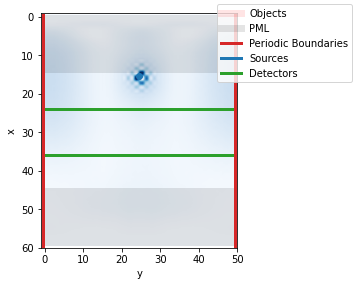

In [5]:
plt.figure()
grid.visualize(z=0, animate = True)

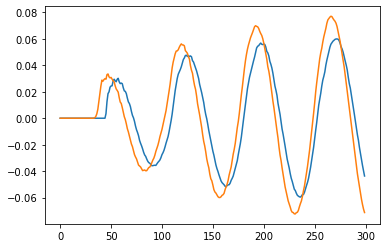

In [6]:
transmission_output = transmisssion_detector.detector_values()
reflection_output = reflection_detector.detector_values()
z_vals_t = [e[int(SOURCE_Y)][2] for e in transmission_output['E']]
z_vals_r = [e[int(SOURCE_Y)][2] for e in reflection_output['E']]
t = [i for i in range(len(z_vals_t))]
plt.plot(t,z_vals_t)
plt.plot(t,z_vals_r)
plt.show()

intensity1 = 0
for i in z_vals_t:
    intensity1 += i**2
intensity1 = intensity1/len(z_vals_t)


In [ ]:
grid2 = fdtd.Grid(
    (GRID_SIZE_X, GRID_SIZE_Y, 1),
    grid_spacing=GRID_SPACING,
    permittivity=1.0,
    permeability=1.0
)

# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid2[0:PML_THICKNESS, :, :] = fdtd.PML(name="pml_xlow")
grid2[-PML_THICKNESS:, :, :] = fdtd.PML(name="pml_xhigh")

grid2[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
#grid2[:, 0:10, :] = fdtd.PML(name="pml_ylow")
#grid2[:, -10:, :] = fdtd.PML(name="pml_yhigh")

point = True

if(point):
    grid2[SOURCE_X,SOURCE_Y, 0] = fdtd.PointSource(
    period=WAVELENGTH / SPEED_LIGHT, name="linesource",
    pulse = PULSE_SOURCE,
    cycle=1,
    hanning_dt=1e-15)
else:
    grid2[SOURCE_X,:, 0] = fdtd.LineSource(
    period=WAVELENGTH / SPEED_LIGHT, name="linesource")



transmisssion_detector2 = fdtd.LineDetector(name="t_detector")
reflection_detector2 = fdtd.LineDetector(name="r_detector")
grid2[TRANSMISSION_DETECTOR_X, :, 0] =transmisssion_detector2
grid2[REFLECTION_DETECTOR_X,:,0] = reflection_detector2

grid2[OBJECT_START_X:OBJECT_END_X,:, :] = fdtd.AnisotropicObject(permittivity=5.1984, name="object")

grid2.run(300, progress_bar=False)

In [ ]:
plt.figure()
grid2.visualize(z=0, animate = True)


In [ ]:
transmission_output2 = transmisssion_detector2.detector_values()
reflection_output2 = reflection_detector2.detector_values()
z_vals_t2 = [e[int(SOURCE_Y)][2] for e in transmission_output2['E']]
z_vals_r2 = [e[int(SOURCE_Y)][2] for e in reflection_output2['E']]
t = [i for i in range(len(z_vals_t2))]
plt.plot(t,z_vals_t2)
#plt.plot(t,z_vals_r2)
plt.show()
hx_trans2 = [e[int(SOURCE_Y)][0] for e in transmission_output2['H']]
hy_trans2 = [e[int(SOURCE_Y)][1] for e in transmission_output2['H']]

plt.plot(t,z_vals_t2)
plt.plot(t,z_vals_t)
plt.legend(["Transmitted signal whith object","Transmitted signal free space"])
plt.show()
intensity2 = 0.00
for i in z_vals_t2:
    intensity2 += i**2
intensity2 = intensity2/len(z_vals_t2)

In [ ]:
intensity2 = 0.00
for i in z_vals_t2:
    intensity2 += i**2
intensity2 = intensity2/len(z_vals_t2)

In [ ]:
transmission = intensity2/intensity1
transmission

In [ ]:
plt.plot(t,z_vals_t)
plt.plot(t,z_vals_t2)


In [ ]:
import numpy

Correct phase shift

In [ ]:
signal1 = z_vals_t
signal2 = z_vals_t2
max_phase_offset = 180
max_corr = 0
best_offset = 0
for offset in range(max_phase_offset):
    offset_sig = signal1[offset:] + signal1[:offset] # phase shift signal with concat  
    correlation = sum(sum(numpy.corrcoef(offset_sig,signal2)))
    if correlation > max_corr:
      max_corr = correlation 
      best_offset = offset 
#phasedshifted_sig = signal1[best_offset :] + signal1[:best_offset ] # phase shift signal with concat
phasedshifted_sig = [0  for i in range(200-best_offset)] + signal1[:best_offset ]

In [ ]:
plt.plot(t,phasedshifted_sig)
plt.plot(t,signal2)

In [ ]:
intensity1 = 0
for i in signal2:
    intensity1 += i**2
intensity1 = intensity1/len(phasedshifted_sig)
intensity2 = 0
for i in phasedshifted_sig:
    intensity2 += i**2
intensity2 = intensity2/len(signal2)

transmission = intensity1/intensity2
transmission

In [ ]:
from scipy.fft import rfft, rfftfreq

In [ ]:
signal1 = phasedshifted_sig
sample_rate = int((numpy.sqrt(2)*SPEED_LIGHT)/GRID_SPACING)

yf1 = rfft(signal1)
yf2 = rfft(signal2)
xf = rfftfreq(200, sample_rate)
plt.plot(xf, numpy.abs(yf1))
plt.plot(xf, numpy.abs(yf2))
plt.show()